<a href="https://colab.research.google.com/github/hariseldon99/Quantum-Harmonic-Numpy/blob/main/SHM_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Harmonic Oscillator with NumPy


In this notebook we discuss a bit the basics of numerical methods and plotting in python by looking at a simple physics problem. Importantly, we will not reinvent the wheel, but use some standard libraries for scientific programming. They will be:

- The [jupyter notebook](https://jupyter.org/), for simple interactive coding.
- [Numpy](https://numpy.org/) for all kinds of numerical methods.
- [Matplotlib](https://matplotlib.org/) for all kind of plotting 

# Quantum harmonical oscillator

We will work our way through quantum harmonic oscillator for which the potential is:
$$
V(X) = \frac{m\omega^2}{2}X^2
$$    

Now, make the co-ordinates dimensionless by defining

\begin{align*}
x &\equiv  \sqrt\frac{m\omega}{2\hbar}\; X\\
v(x) &\equiv \frac{V(x)}{\hbar\omega} = x^2.
\end{align*}

We would now like to plot it up. For that we will need to import some routines, which simplify this.

In [1]:
# import plotting and numerics
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA

now let us plot the potential

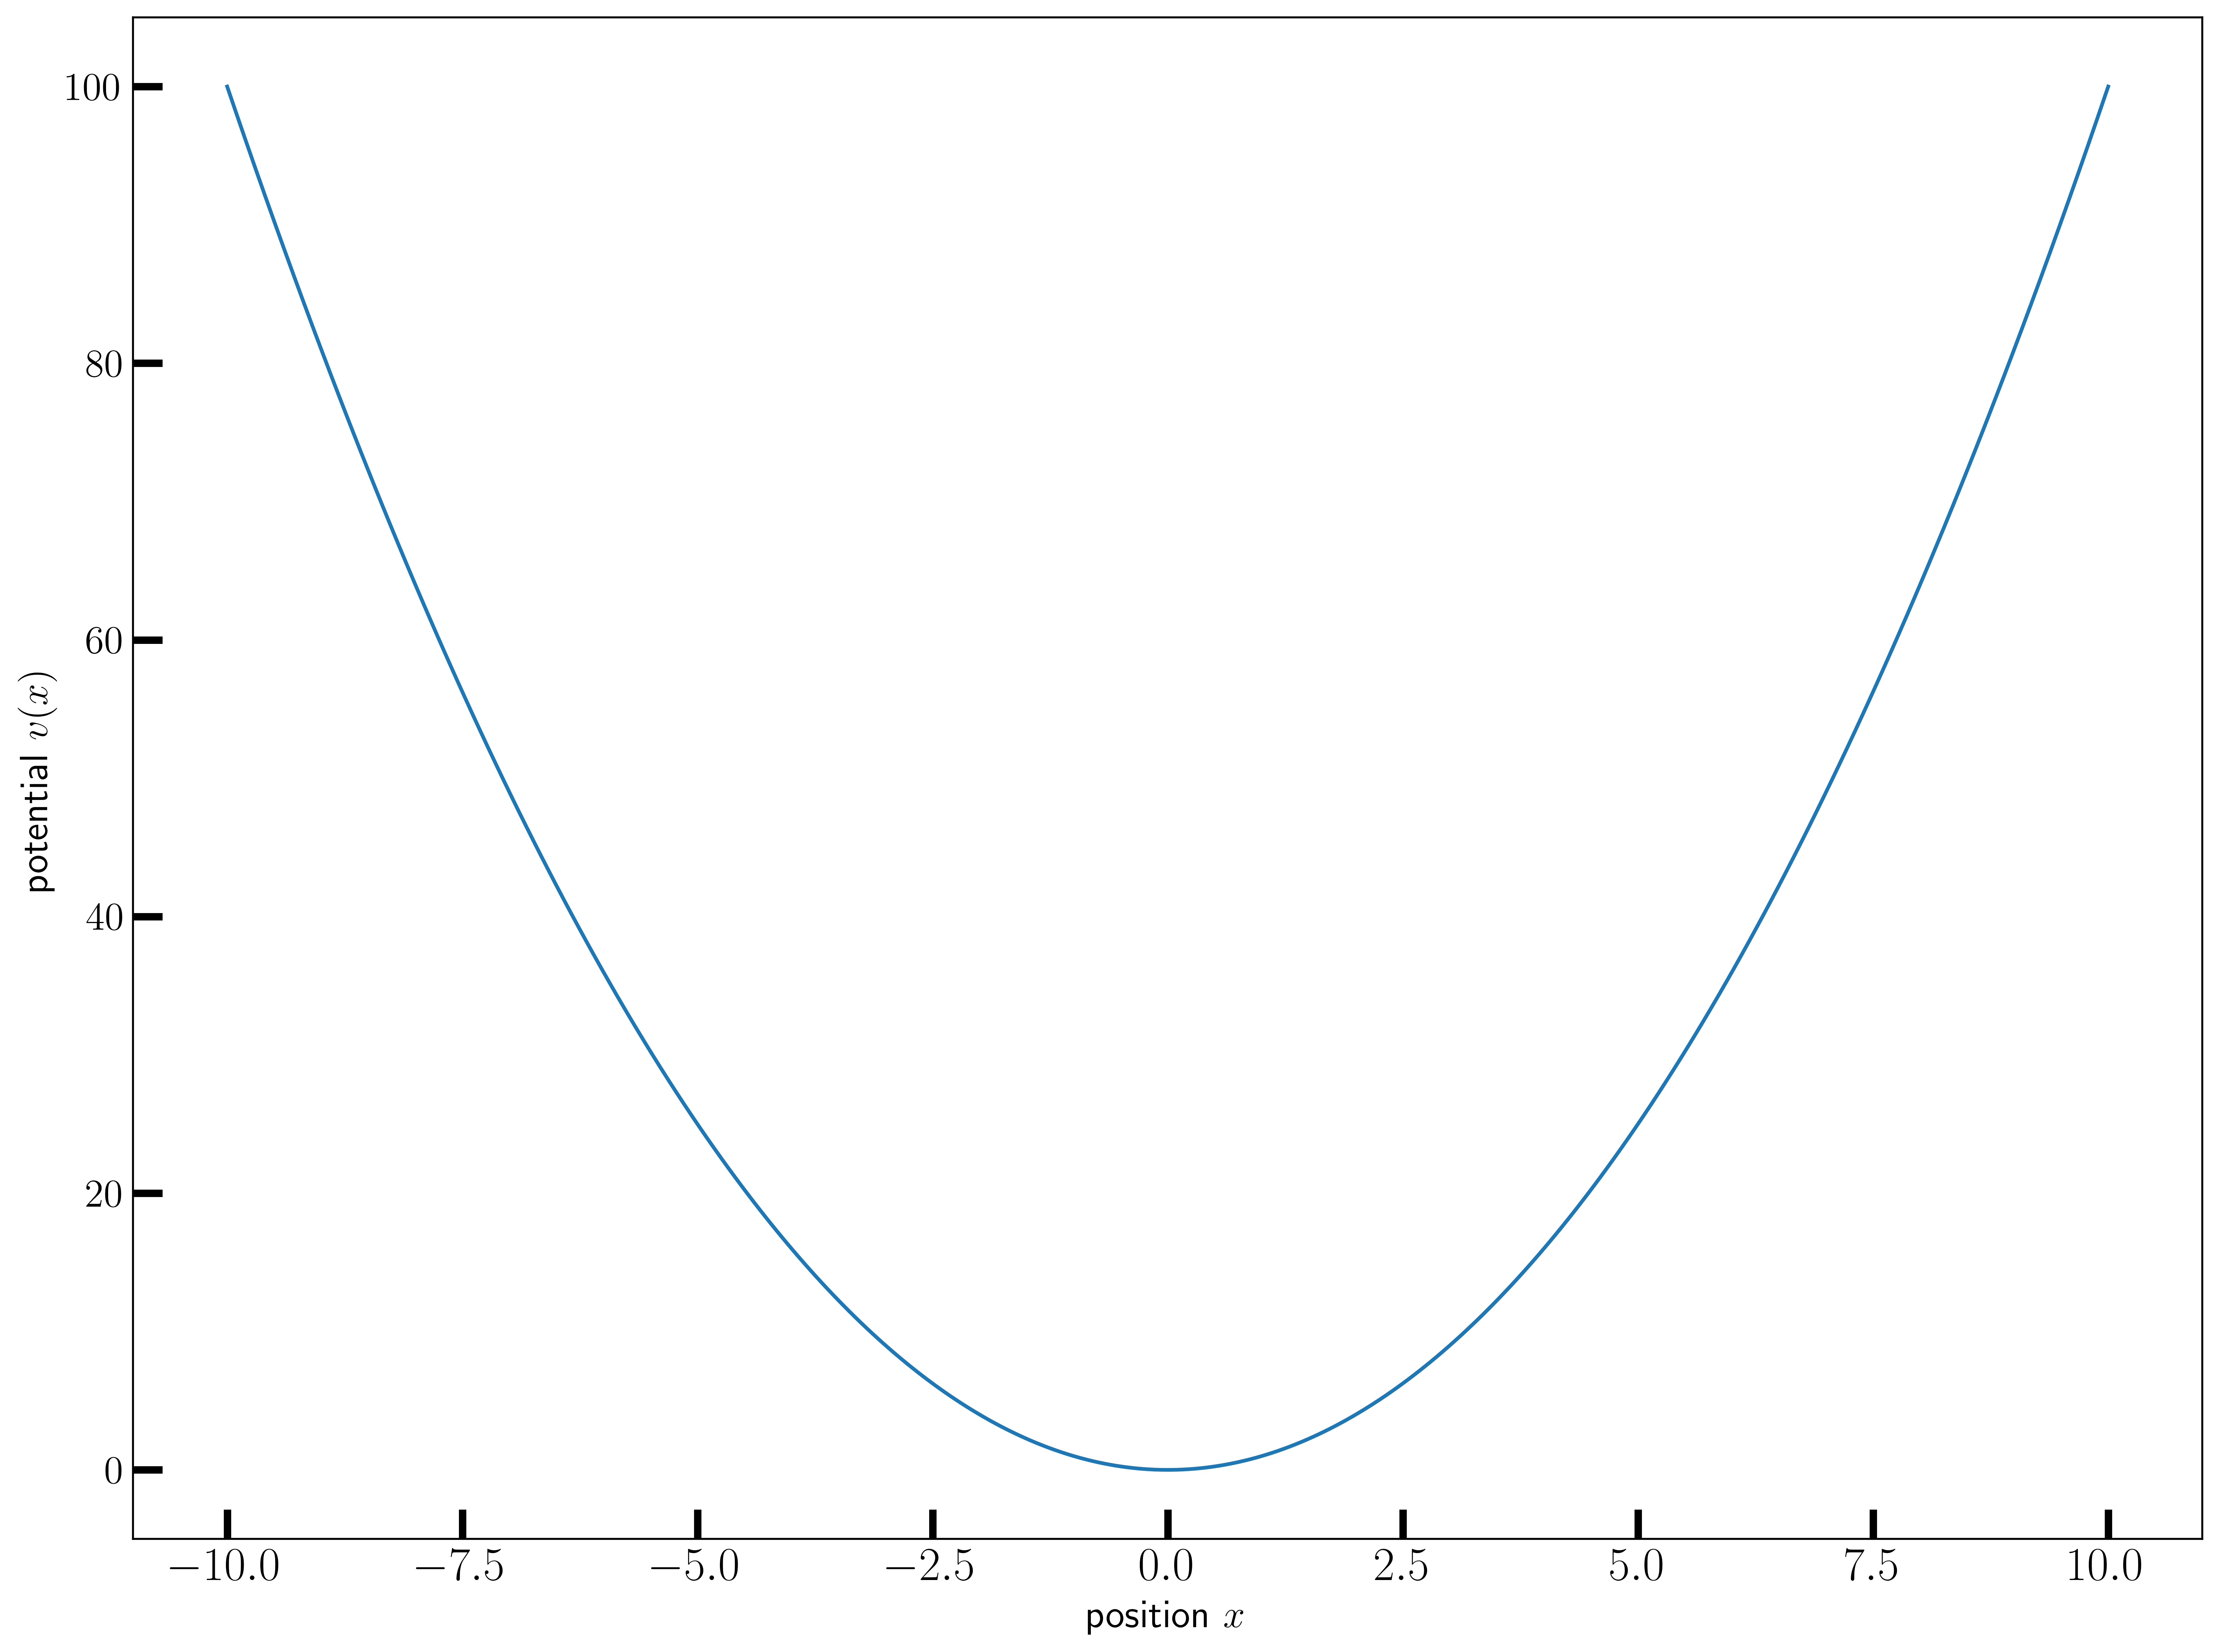

In [2]:
# parameters of the grid
Ngrid = 1001
xmin = -10 
xmax = 10

xvec = np.linspace(xmin,xmax,Ngrid)#a vector spanning from -10 to 10 with 100 grid points
Vx = xvec**2

f, ax = plt.subplots()
ax.plot(xvec,Vx)
ax.set_xlabel('position $x$')
ax.set_ylabel('potential $v(x)$')
plt.show()

# Numerical diagonalization

While the potential is nice to look at, we would actually like to use python to do some more powerful stuff than simple plots. One of them is the numerical diagonialization of the quantum problem, that is, to find the eigenfuntions $\psi(x)$ such that


\begin{align*}
\hat{H}\;\psi(x) &= E\;\psi(x)\\
\hat{H} &= \frac{P^2}{2m} + \frac{1}{2}m\omega^2X^2
\end{align*}

Using the canonical quantum relation $P \rightarrow i\hbar\displaystyle\frac{d}{dX}$, we get the Sturm-Liouville problem

\begin{equation}
-\frac{\hbar^2}{2m}\frac{d^2\psi(X)}{dX^2} + \frac{1}{2}m\omega^2 X^2\psi(X) = E\;\psi(X)
\end{equation}

We now define a dimensionless momentum $p = \displaystyle\frac{P}{\sqrt{2m\hbar\omega}}\rightarrow \displaystyle\frac{i}{2}\;\displaystyle\frac{d}{dx}$, and a dimensionless Hamiltonian $\hat{h}=\frac{\hat{H}}{\hbar\omega}$, yielding

\begin{equation}
-\frac{1}{4}\psi^{\prime\prime}(x) + v(x)\psi(x) = \epsilon\psi(x).
\end{equation}

where the dimensionless energy $\epsilon\equiv E/\hbar\omega$.


## Kinetic energy
While the actual $\psi(x)$ is a continuous function, we can discretize it on a grid using the following observations from quantum physics

* As $v(x)$ becomes higher, $\psi(x)$ becomes smaller in magnitude.
* The Harmonic Potential increases from $x=0$ in either direction.

When we plotted the potential $v(x)$ above, we already chose limits for $x$, namely $x_m=\pm 10$. In addition, we divided this region $-x_m\leq x \leq x_m$ into discrete values $x_i = \left\{x_0, x_1, \dots x_{N-1}\right\}$ of spacing $h$, and plotted the discrete potential array $v=\left\{v_0, v_1, \dots v_{N-1}\right\}=\left\{v(x_0), v(x_1), \dots v(x_{N-1})\right\}$. 

Similarly, we can map (approximately) $\psi(x)\rightarrow \vert\psi\rangle=\left\{\psi_0, \psi_1, \dots \psi_{N-1}\right\}\approx\left\{\psi(x_0), \psi(x_1), \dots \psi(x_{N-1})\right\}$. Next, we similarly map the second order derivative as follows:
\begin{align*}
\psi^{\prime\prime}(x) &= \lim_{\delta x\rightarrow 0}\frac{\psi(x-dx)+\psi(x+dx)-2\psi(x)}{dx^2}\\
                       &\approx \frac{\psi(x-h)+\psi(x+h)-2\psi(x)}{h^2}\\
\psi^{\prime\prime}(x_i)&\approx h^{-2}\;\left(\psi_{i-1} + \psi_{i+1}-2\psi_i\right).                       
\end{align*}
Substituting into the differential equation in the previous section yields a discrete set of infinite mutually coupled linear equations $\forall i = -\infty,\dots,\infty$
\begin{equation}
-\frac{1}{4h^2}\left(\psi_{i-1} + \psi_{i+1}-2\psi_i\right) + v(x_i)\psi_i = \epsilon\psi_i.
\end{equation}
Now, we make a *Truncation Approximation*, where we assume that, since $x_{-1}, x_{-2},\dots x_{-\infty} < -x_m$, and $x_{N}, x_{N+1},\dots x_{\infty} > x_m$, the corresponding $\psi_i$s can be neglected. This yields a **finite** set of $N$ coupled algebraic equations, which we can write in matrix-vector form as follows:

\begin{equation*}
\left[-k^2\begin{pmatrix}
-2  & 1 & 0 & 0 \dots\\
1 & -2  & 1 & 0 \dots\\
0 & 1 & -2 & 1  \dots\\
\vdots & \vdots  & \ddots & \vdots\\
0 & 0 & \dots & -2
\end{pmatrix}
+
\begin{pmatrix}
v_0  & 1 & 0 & 0 \dots\\
1 & v_1  & 1 & 0 \dots\\
0 & 1 & v_2 & 1  \dots\\
\vdots & \vdots  & \ddots & \vdots\\
0 & 0 & \dots & v_{N-1}
\end{pmatrix}\right]
\begin{pmatrix}
\psi_0\\
\psi_1\\
\psi_2\\
\vdots\\
\psi_{N-1}
\end{pmatrix} = \epsilon
\begin{pmatrix}
\psi_0\\
\psi_1\\
\psi_2\\
\vdots\\
\psi_{N-1}
\end{pmatrix},
\end{equation*}
with $k\equiv (2h)^{-1}$. Thus, we now have to diagonalzie the $N\times N$ matrix on the left if we want approximate values of $\epsilon$ and the $\psi_i$s. We already know how to do this using Numpy from previous classes. Let us write the matrix $H = T + V$, where the Kinetic Energy matrix
\begin{equation}
T = -k^2\begin{pmatrix}
-2  & 1 & 0 & 0 \dots\\
1 & -2  & 1 & 0 \dots\\
0 & 1 & -2 & 1  \dots\\
\vdots & \vdots  & \ddots & \vdots\\
0 & 0 & \dots & -2
\end{pmatrix}
\end{equation}
This matrix is easy to prepare using Numpy. The matrix is *tridiagonal*, with $-2$ along the diagonal, and ones along both the superdiagonal and subdiagonal. So, we can use Numpy routines to make this.

In [3]:
#resolution of the grid
h = np.diff(xvec).mean()

k = 1/(2*h)
dia = -2*np.ones(Ngrid)
offdia = np.ones(Ngrid-1)
T_mat = -k**2 * (np.diag(dia) + np.diag(offdia,-1) + np.diag(offdia,1))
T_mat

array([[1250., -625.,   -0., ...,   -0.,   -0.,   -0.],
       [-625., 1250., -625., ...,   -0.,   -0.,   -0.],
       [  -0., -625., 1250., ...,   -0.,   -0.,   -0.],
       ...,
       [  -0.,   -0.,   -0., ..., 1250., -625.,   -0.],
       [  -0.,   -0.,   -0., ..., -625., 1250., -625.],
       [  -0.,   -0.,   -0., ...,   -0., -625., 1250.]])

## Potential energy

This one is just a diagonal matrix that we have to initialize properly:
\begin{equation}
V = \begin{pmatrix}
v_0  & 0 & 0 & 0 \dots\\
0 & v_1  & 0 & 0 \dots\\
0 & 0 & v_0 & 0  \dots\\
\vdots & \vdots  & \ddots & \vdots\\
0 & 0 & \dots & v_{N-1}
\end{pmatrix}
\end{equation}

In [4]:
#potential energy as matrix
V_mat = np.diag(Vx,0)
V_mat

array([[100.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,  99.6004,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,  99.2016, ...,   0.    ,   0.    ,   0.    ],
       ...,
       [  0.    ,   0.    ,   0.    , ...,  99.2016,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,  99.6004,   0.    ],
       [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    , 100.    ]])

# Diagonalization

We can now put them together as:

In [5]:
#%% combine to Hamiltonian, diagonalize and plot the lowest 30 energy eigenvalues
H =  T_mat + V_mat

# diagonalization
w, v = LA.eig(H)
# sort it such that things look nice later
sortinds = np.argsort(w)
EigVecs = v[:,sortinds]
EigVals = w[sortinds]

Time to plot up the eigenvalues. Let us also compare them with the known analytical solution, where $E = \left(n+\frac{1}{2}\right)\hbar\omega$, or $\epsilon=n+\frac{1}{2}$.


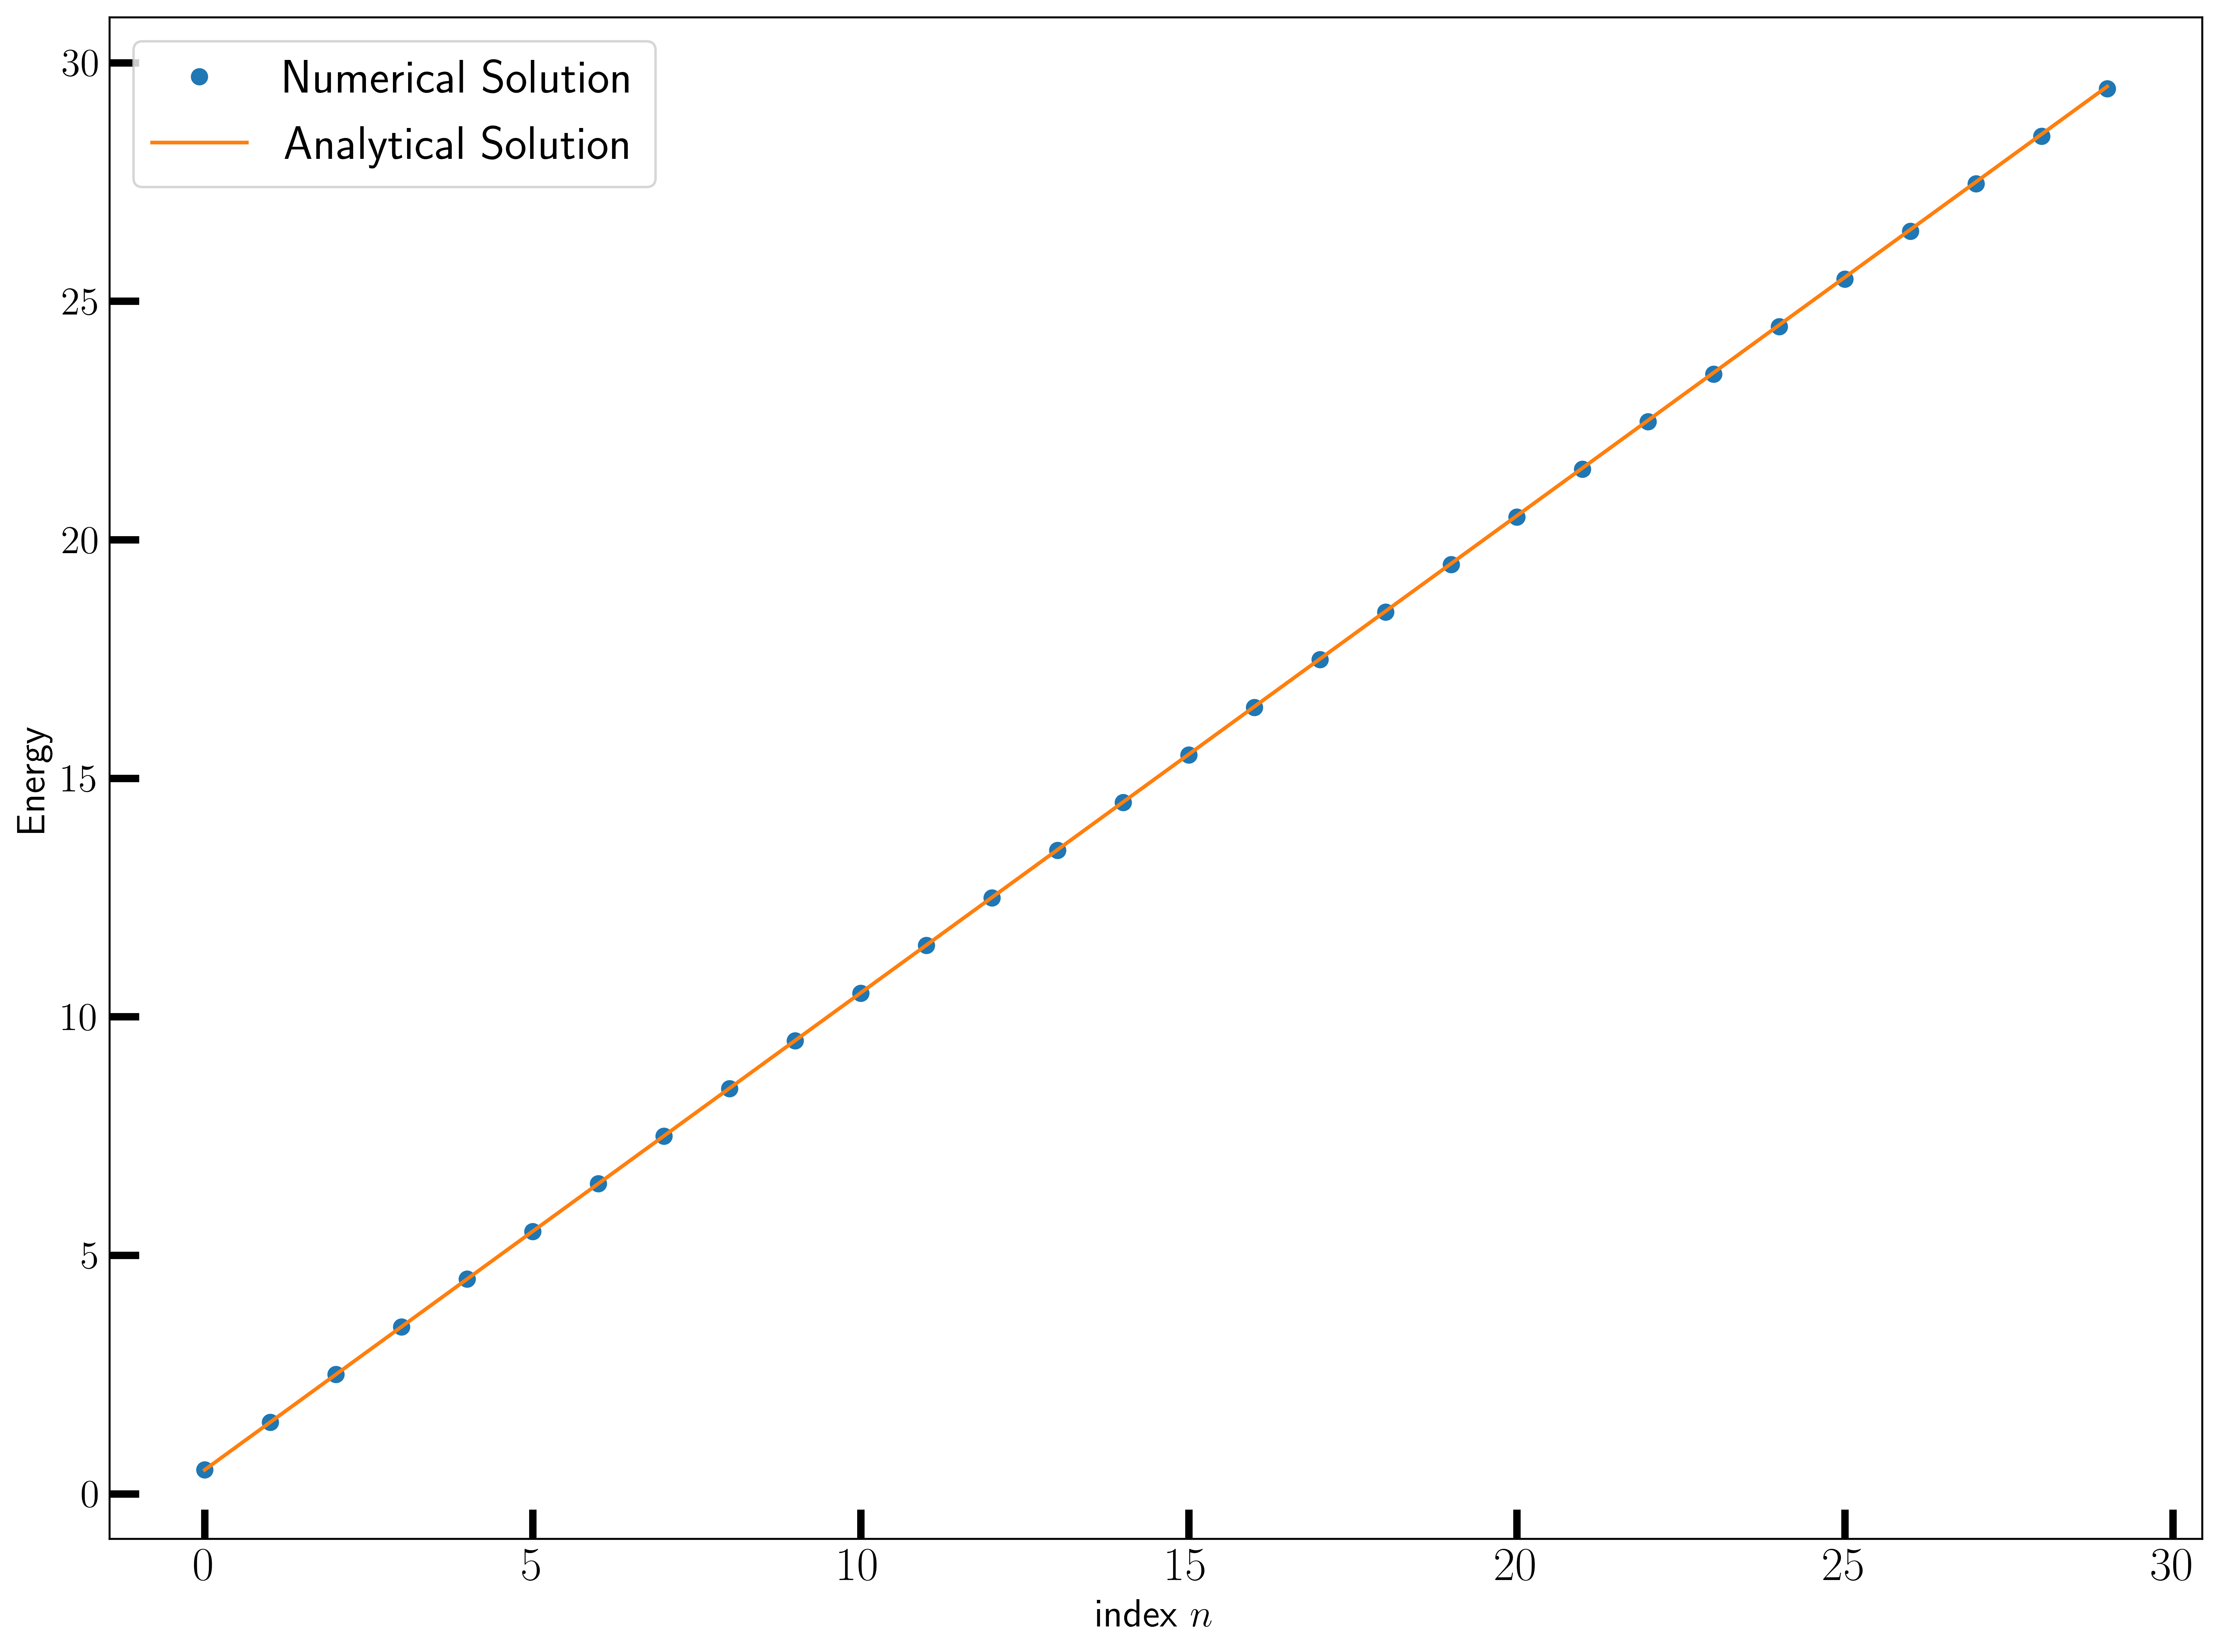

In [6]:
f, ax = plt.subplots()
ax.plot(EigVals[0:30],'o', label="Numerical Solution")

nvals = np.arange(0,30)
evals = nvals + 0.5
ax.plot(evals, label="Analytical Solution")

ax.set_ylabel('Energy')
ax.set_xlabel('index $n$')
plt.legend()
plt.show()

and now some eigenfunctions

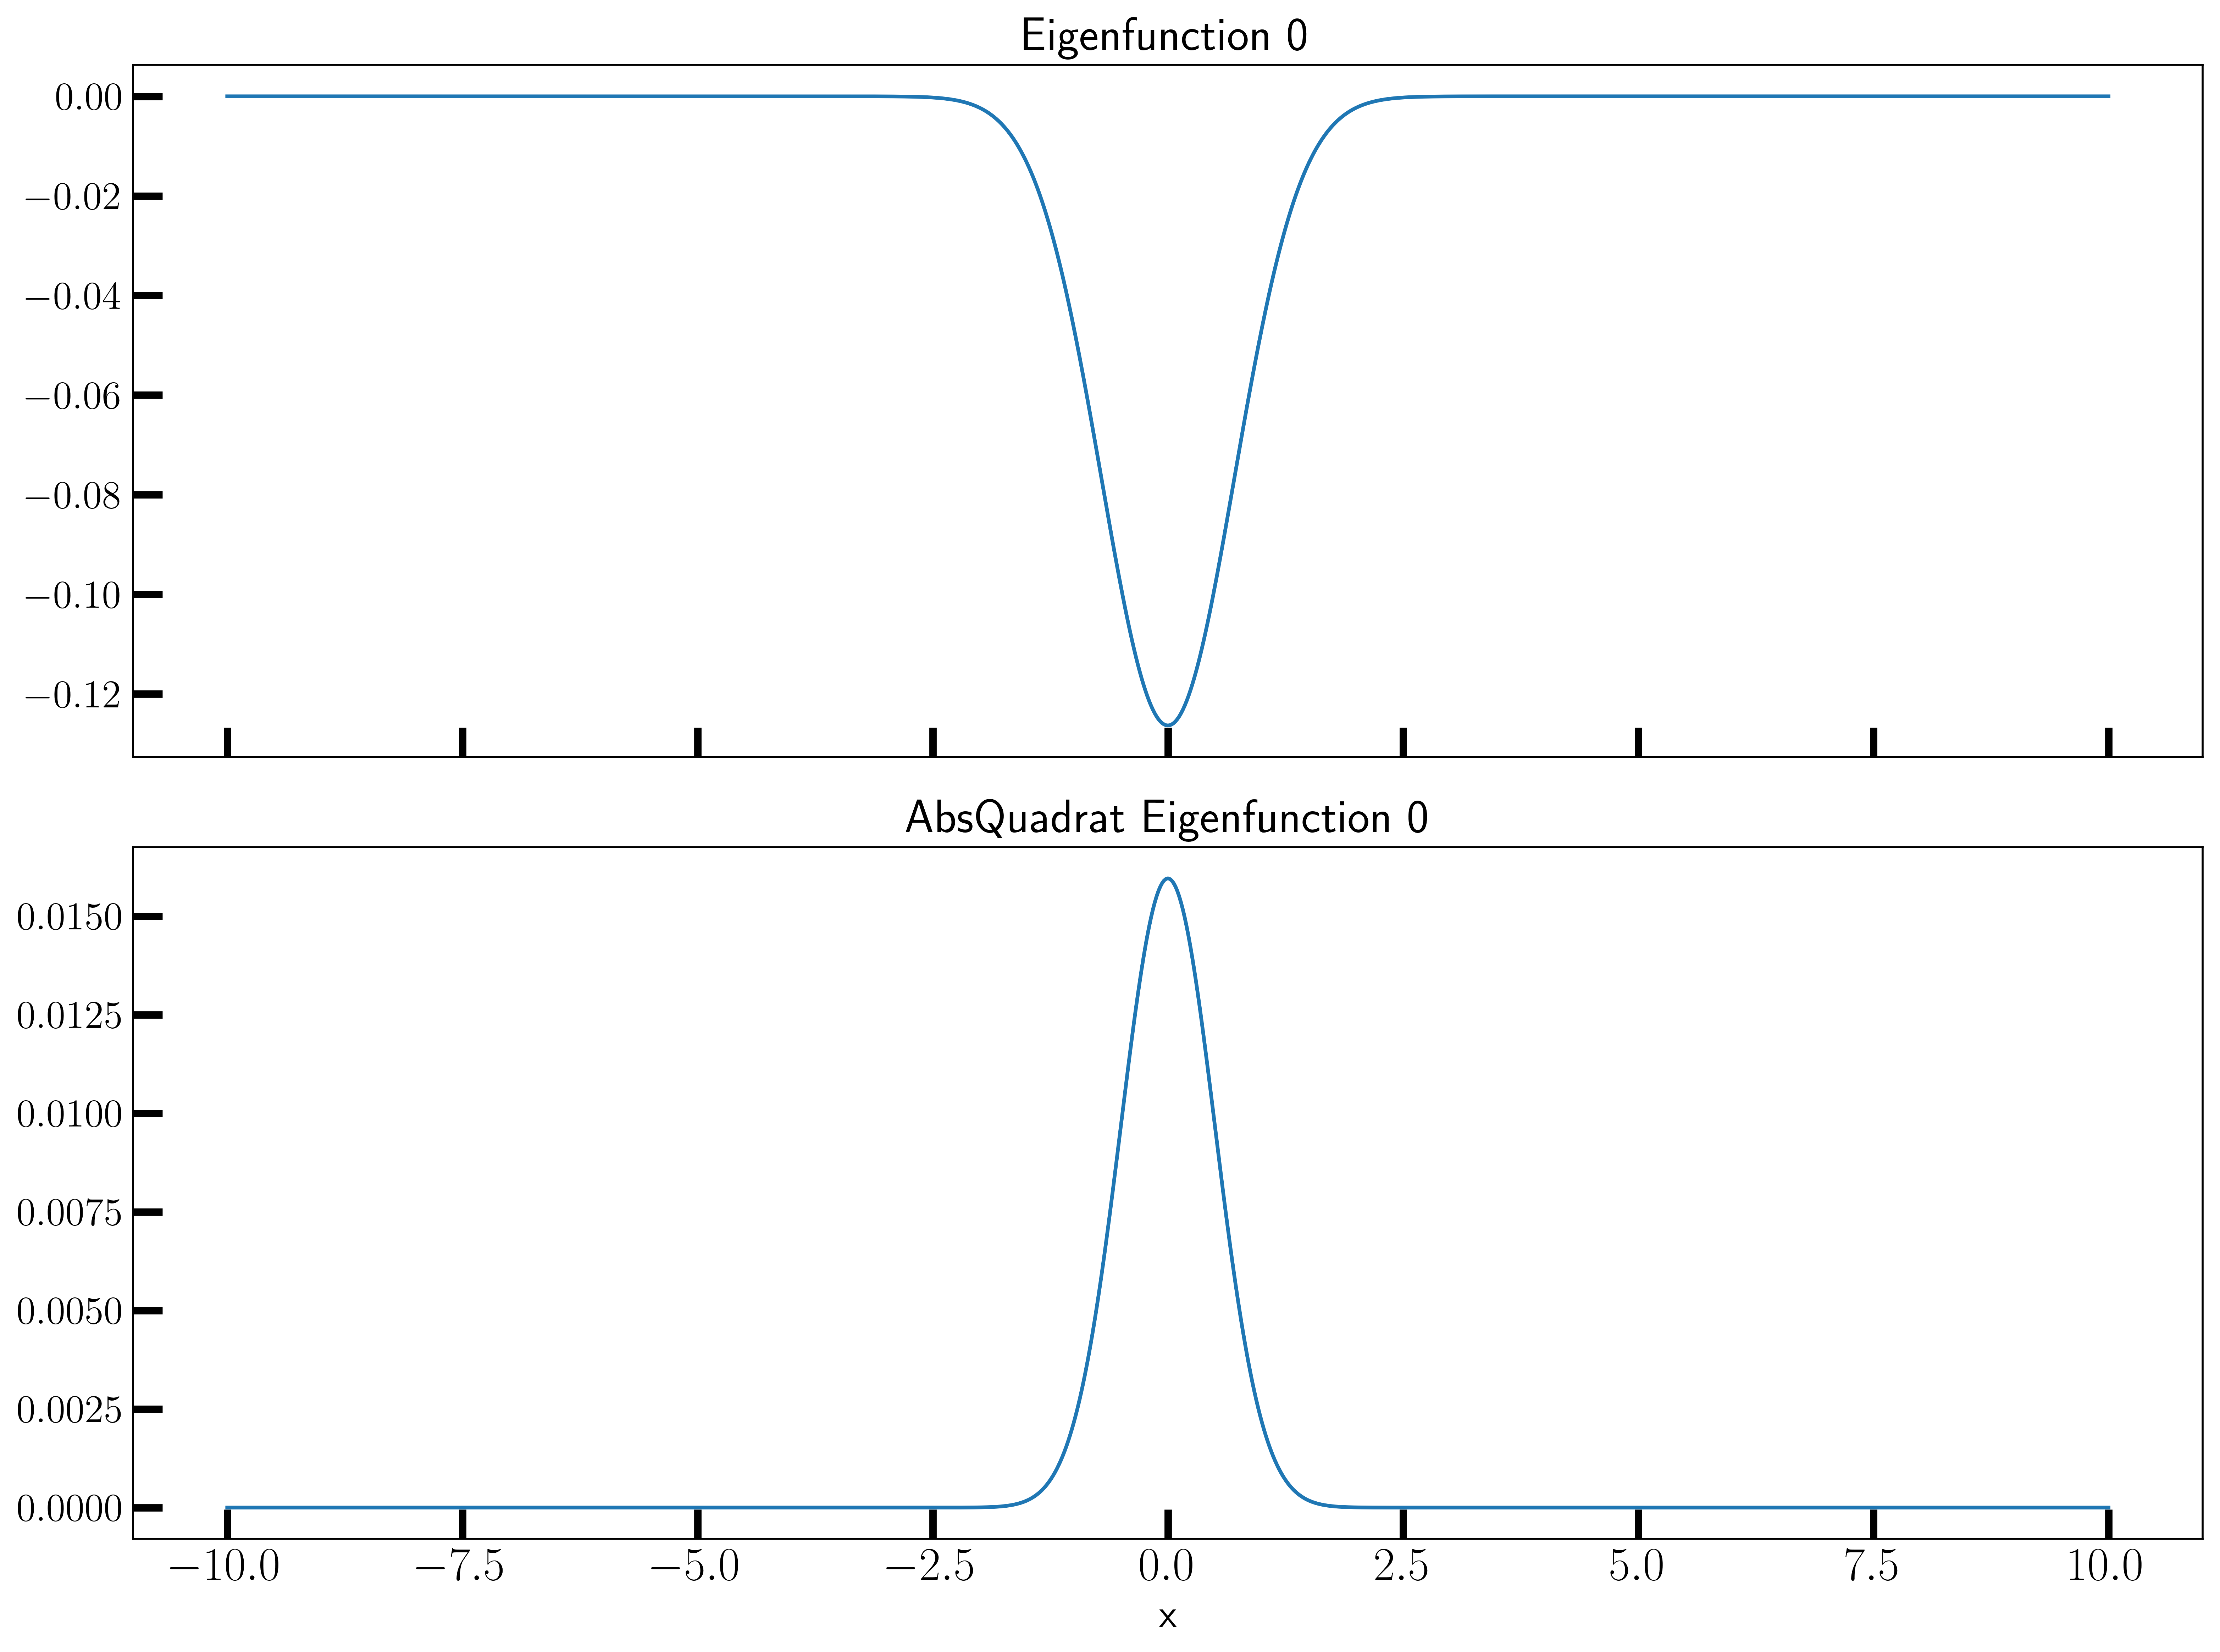

In [7]:
n=0
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

ax1.plot(xvec,np.real(EigVecs[:,n]))
ax1.set(title='Eigenfunction %d'%(n))
ax2.plot(xvec,np.abs(EigVecs[:,n])**2)
ax2.set(title='AbsQuadrat Eigenfunction %d'%(n),xlabel='x')
fig.tight_layout()
plt.show()

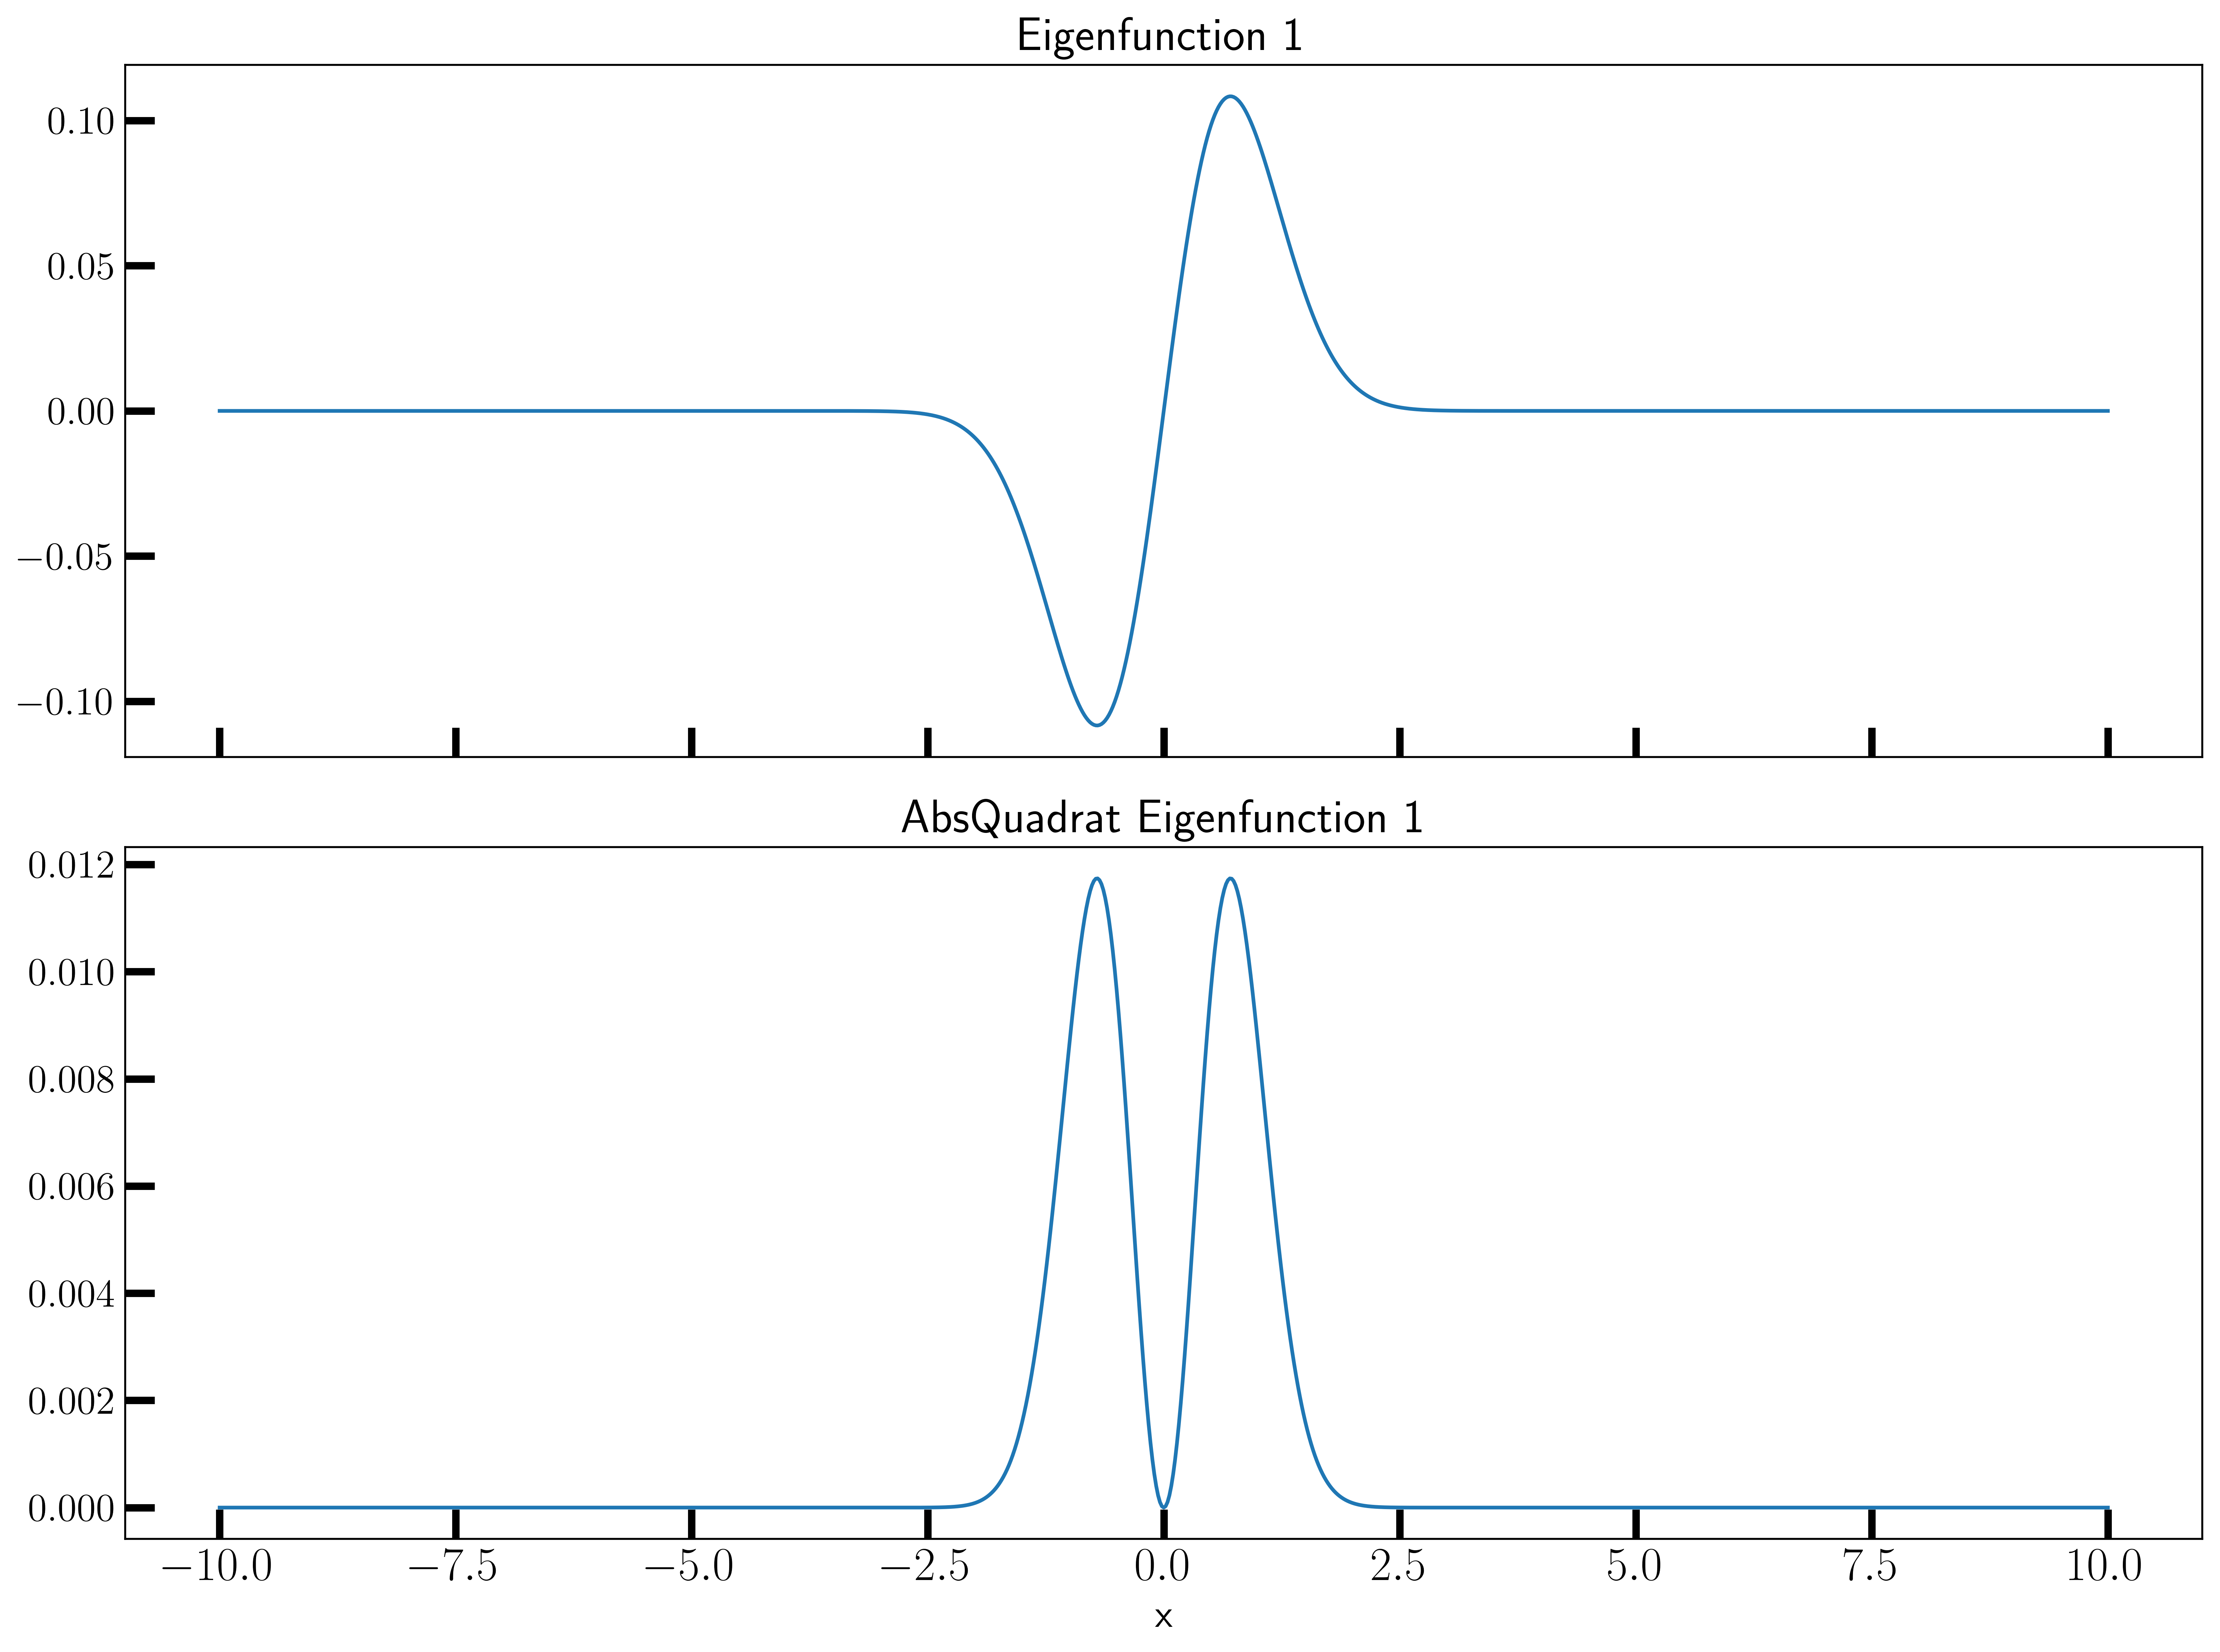

In [8]:
n=1
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)

ax1.plot(xvec,np.real(EigVecs[:,n]))
ax1.set(title='Eigenfunction %d'%(n))
ax2.plot(xvec,np.power(np.abs(EigVecs[:,n]),2))
ax2.set(title='AbsQuadrat Eigenfunction %d'%(n),xlabel='x')
fig.tight_layout()
plt.show()

# Extension to more complex systems
Feel free to extend this further as you wish at some later stage. For instance, you could try this for smaller values of $N$ and see how bad your results get. Also, you could add an anharmonic term to the potential (say $\alpha x^4$) and look at the results. The code lies in the cell below.

Note that exact analytical solutions to the anharmonic oscillator do not exist. However, approximate solutions are possible using *perturbation theory*. The calculations are straightforward, but very lengthy. They have been published in a paper by Carl Bender and Tai T. Wu ([click here](https://doi.org/10.1103/PhysRev.184.1231) for the paper).

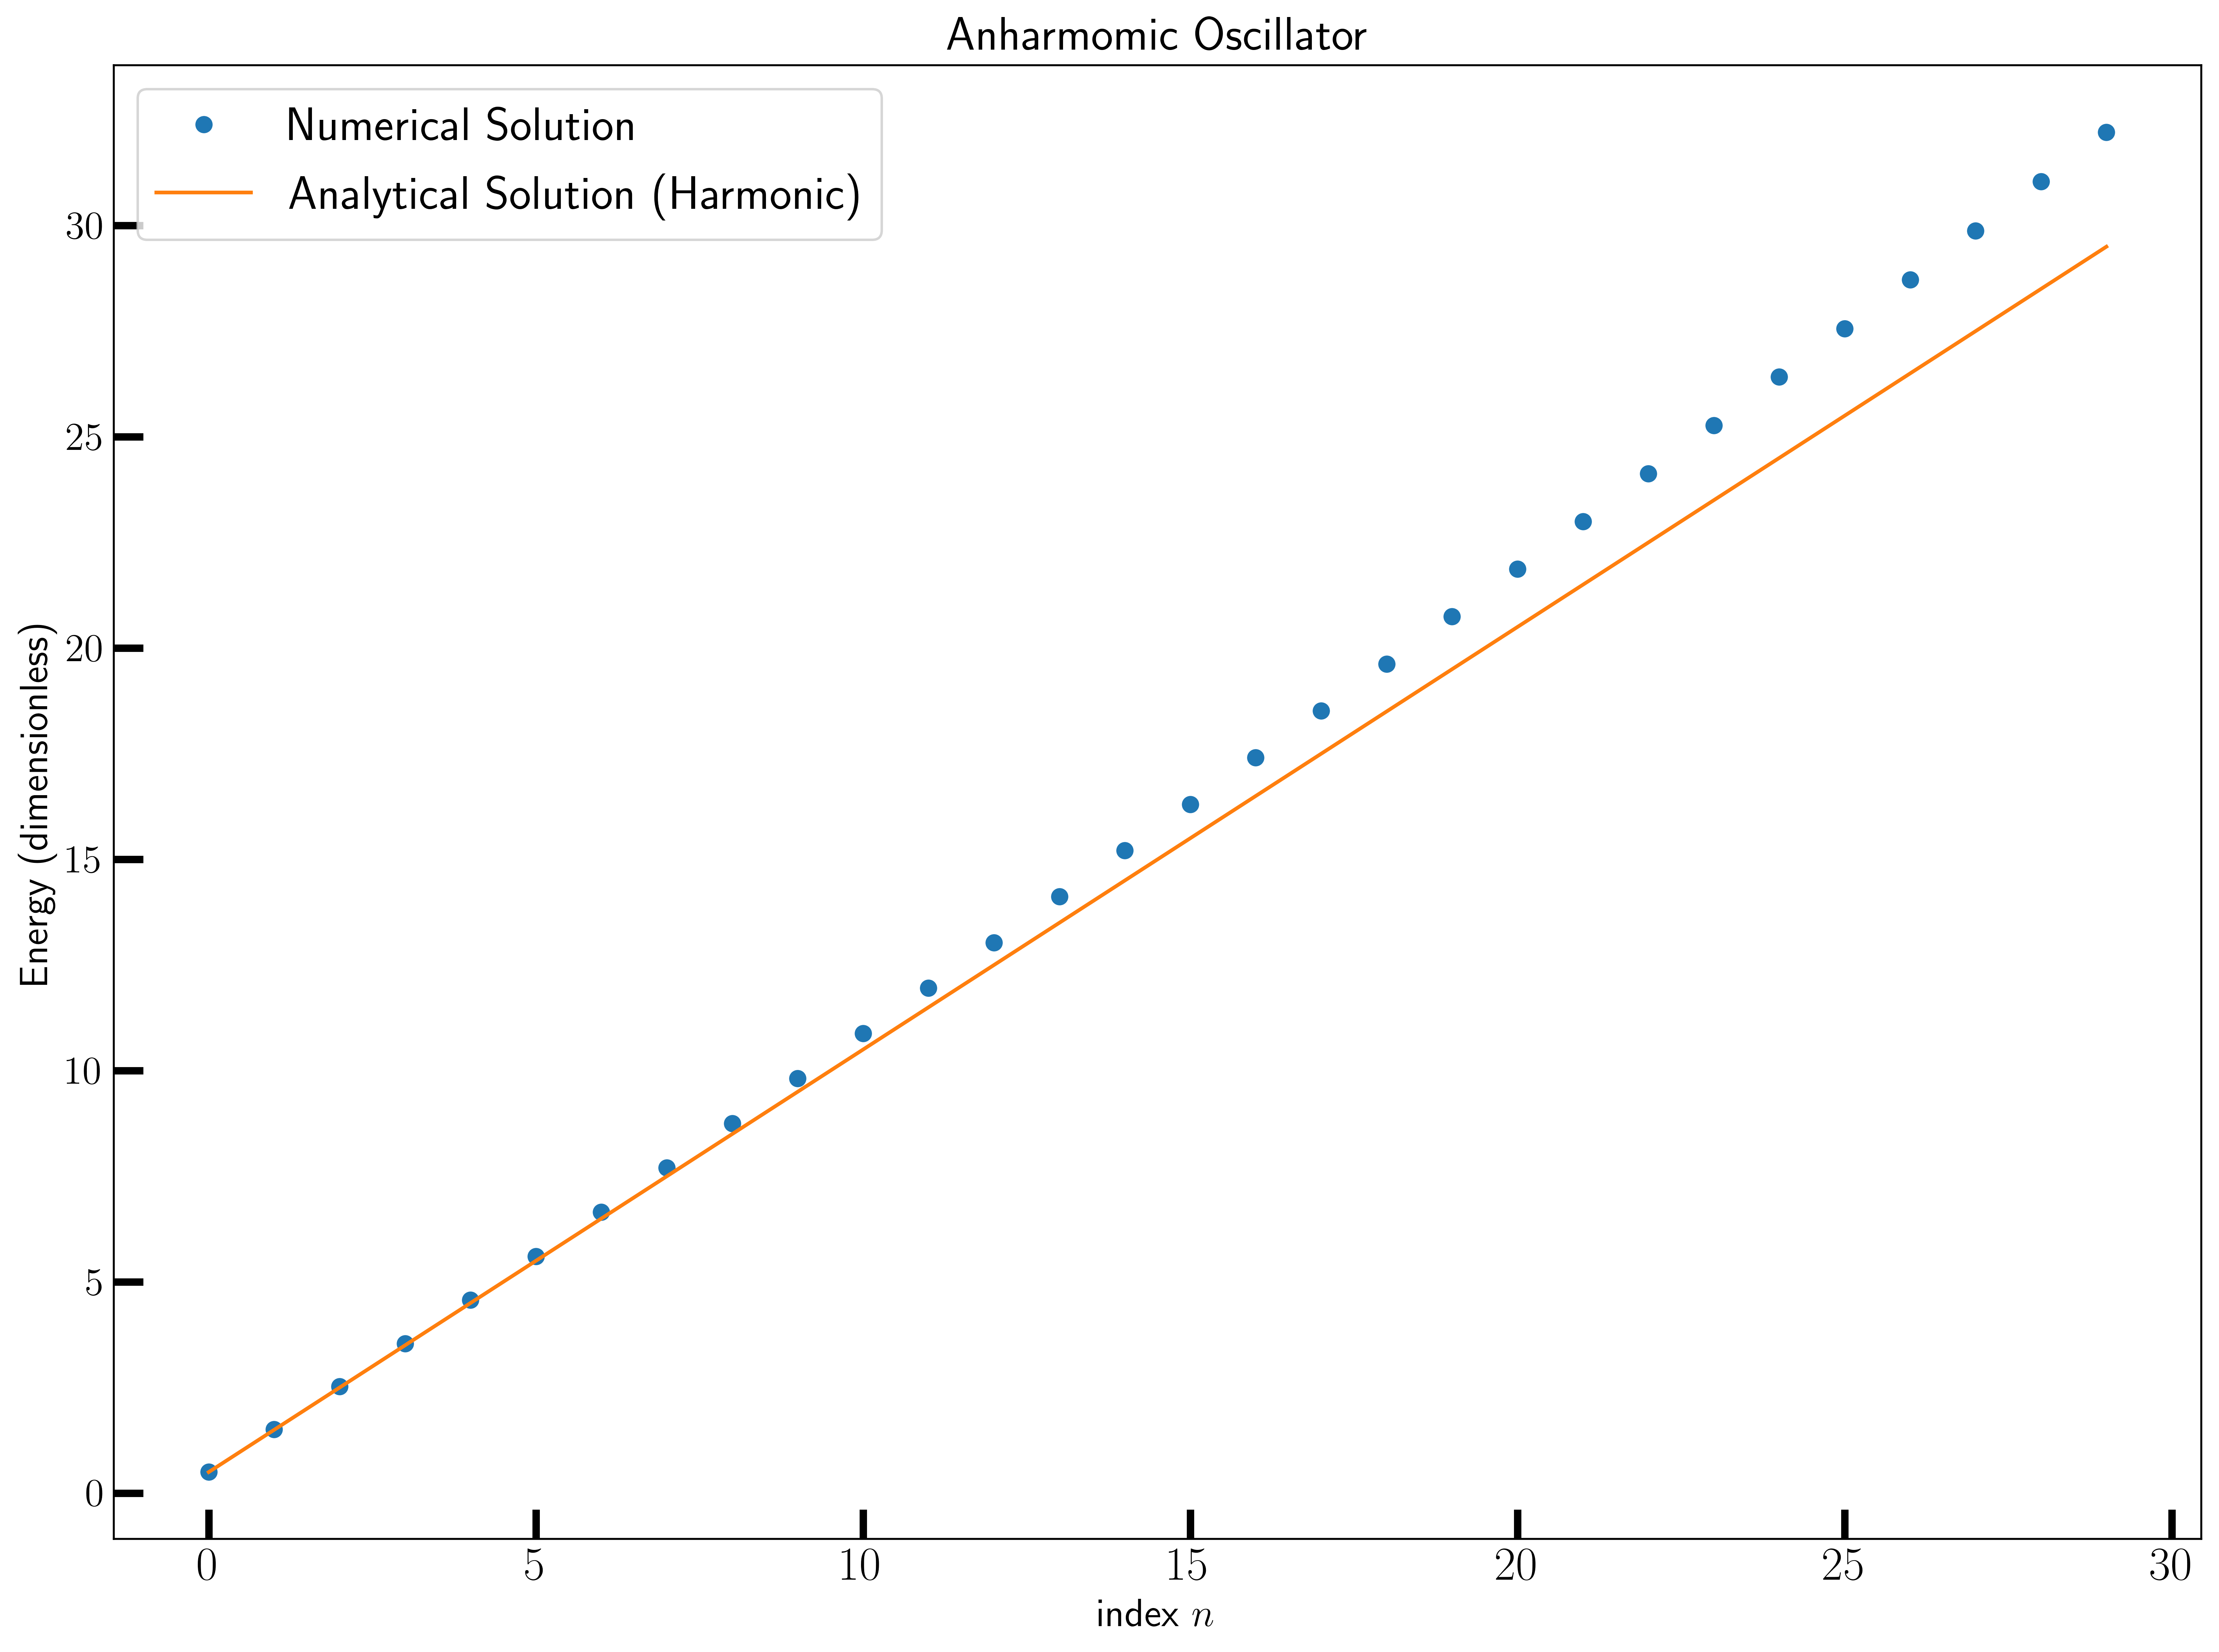

In [9]:
alpha = 0.01
Vx = xvec**2 + alpha * xvec**4
#potential energy as matrix
V_mat = np.diag(Vx,0)
#%% combine to Hamiltonian, diagonalize and plot the lowest 30 energy eigenvalues
H =  T_mat + V_mat
# diagonalization
w, v = LA.eig(H)
# sort it such that things look nice later
sortinds = np.argsort(w)
EigVecs = v[:,sortinds]
EigVals = w[sortinds]
f, ax = plt.subplots()
ax.set_title("Anharmomic Oscillator")
ax.plot(EigVals[0:30],'o', label="Numerical Solution")

nvals = np.arange(0,30)
evals = nvals + 0.5
ax.plot(evals, label="Analytical Solution (Harmonic)")

ax.set_ylabel('Energy (dimensionless)')
ax.set_xlabel('index $n$')
plt.legend()
plt.show()